# Plot Music Spectrogram
This notebook can be used to plot the spectrogram you used to stimulate your leg!

## Setup
To run this notebook, we'll need to install and import several packages.

In [ ]:
# Import packages we need 
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # configure high-resolution plotting
print('Packages imported.')

### What is your audio file called?

Make sure your audio file is in the same folder as this notebook (/Utilities) and change the name of the file below. to match your recording.

In [ ]:
wav_file = 'WAP.wav'

## Import your audio file

There are several options for you to import your audio file. These will work or not depending on the exact format of your file. You're invited to use whichever works for you. You should try Option 1, and then skip to "Plot your audio track." If that step doesn't work, go back and try Option 2, and so on.

### Option 1, using wavio

In [37]:
!pip install wavio

In [41]:
import wavio
song = wavio.read(wav_file)
timestamps = np.arange(song.data.shape[0])/song.rate
recording = song.data[:,0]
print('wav file successfully imported.')

wav file successfully imported.


### Option 2, using wave & pylab

In [36]:
import wave
import pylab
wav = wave.open(wav_file, 'r')
frames = wav.readframes(-1)
frame_rate = wav.getframerate()

recording = pylab.frombuffer(frames, 'int16') # this needs to be modified for stereo tracks
timestamps = np.arange(len(recording))/frame_rate

wav.close()
print('wav file successfully imported.')

wav file successfully imported.


In [25]:
timestamps

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       3.30158050e+01, 3.30158277e+01, 3.30158503e+01])

### Option 3, using scipy.io.wavefile

In [ ]:
from scipy.io.wavfile import read # alternate way to do this

sampling_frequency, recording = read(wav_file)
timestamps = np.arange(len(recording))/sampling_frequency
print('wav file successfully imported.')

## Plot your audio track

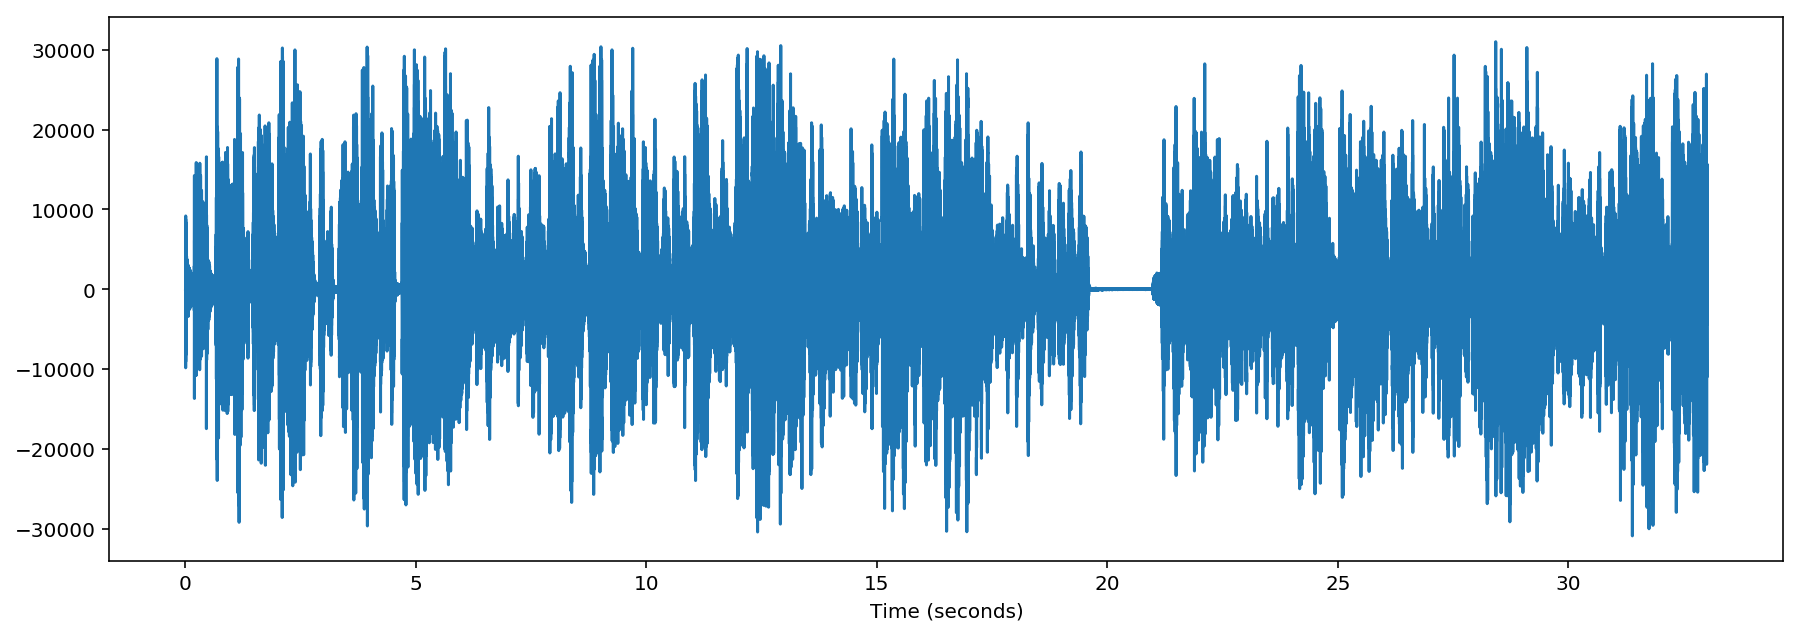

In [42]:
plt.figure(figsize=(15,5))
plt.plot(timestamps,recording)
plt.xlabel('Time (seconds)')
plt.show()

## Plot a spectrogram of your audio track

### Option 1, using specgram
[specgram documentation](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.specgram.html)

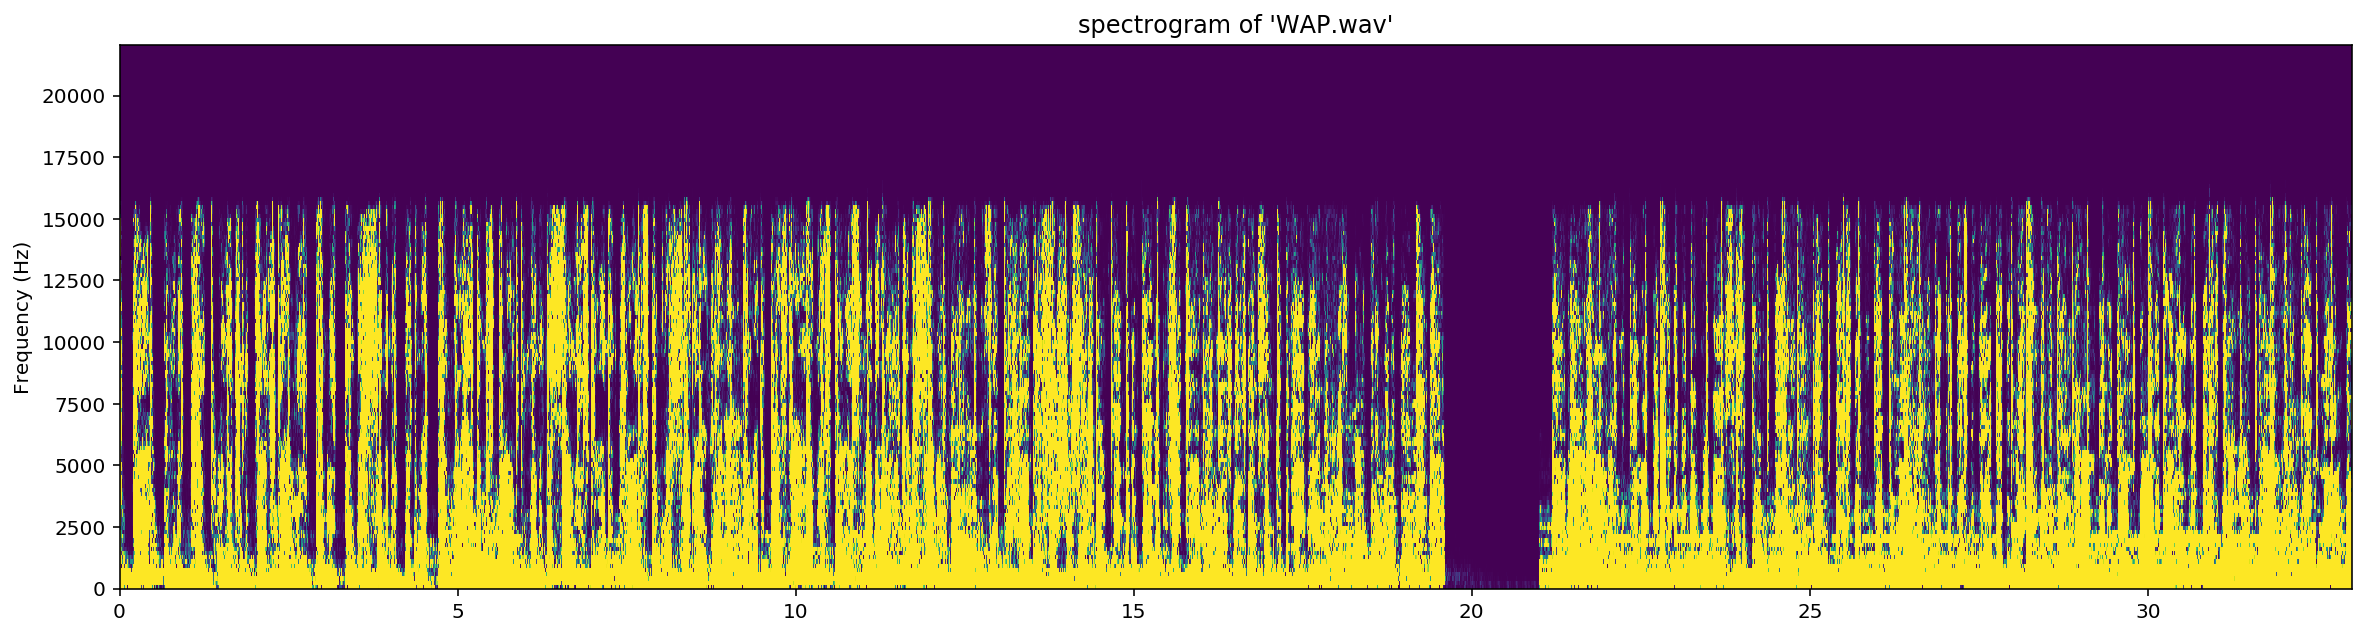

In [45]:
vmax = 20 # change the max value on your spectogram -- you may need to adjust this

plt.figure(figsize=(20,5))
plt.title('spectrogram of %r' % wav_file)
plt.specgram(recording, Fs=frame_rate,scale='linear',vmax=vmax)
plt.ylabel('Frequency (Hz)')

plt.show()

### Option 2, using scipy.spectrogram
[scipy spectrogram documentation](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.signal.spectrogram.html)

In [ ]:
from scipy import signal

frequencies, times, spectrogram = signal.spectrogram(x = recording, fs = frame_rate)

plt.figure(figsize=(20,5))

plt.pcolormesh(times, frequencies, spectrogram,vmax=vmax,)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
plt.ylim([0,8000])

plt.show()